In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import random_unitary
from qiskit.circuit.library import UnitaryGate
from qiskit.circuit.library import RZGate
from qiskit.quantum_info import Operator
import numpy as np
import json
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Pauli
import os
import matplotlib.pyplot as plt
import itertools
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import DensityMatrix, partial_trace, Operator
import numpy as np

import Create_quantum_circuit
# import Compare_closeness_quantum_state 
# import Simulate_local_observable
import Manipulate_layers
# import Computing_with_reduced_state
# import Statistics
# import Deal_with_dictionary
import time
import local_projection_computation

## Benchmarking Runtime: Statevector vs. Local Projection Methods

### Reproducing Figure 2a from the Paper

This section benchmarks the runtime of **statevector simulation** and the **local projection method** for classically describing quantum circuits.

We begin by showing a **pre-computed result** below, which illustrates:
- The **scaling of runtime** with respect to the number of qubits (at a fixed depth of 6)
- An estimate of how long each computation might take

---

### Customize Your Benchmark

You can modify the benchmark parameters by changing the inputs to the following function:

```python
def benchmark_statevector_vs_local_projection(
    file_name="comparison_statevector_vs_local_projection_computation.txt", 
    min_qubits_lp, max_qubits_lp, 
    min_qubits_sv, max_qubits_sv, 
    depth, 
    num_patterns
):

In [2]:
min_qubits_lp = 20 # Minimum number of qubits for local projection
max_qubits_lp = 100 # Maximum number of qubits for local projection
min_qubits_sv = 20 # Minimum number of qubits for statevector simulation
max_qubits_sv = 32 # Maximum number of qubits for statevector simulation
depth = 6 # Depth of the circuits to be compared
n_patterns = 1 # Number of patterns to be compared

local_projection_computation.benchmark_statevector_vs_local_projection(
        file_name="Evaluation_Arifact_comparison_statevector_vs_local_projection_computation_depth_6.txt", 
        min_qubits_lp=min_qubits_lp, max_qubits_lp=max_qubits_lp, 
        min_qubits_sv=min_qubits_sv, max_qubits_sv=max_qubits_sv, 
        depth=depth, n_patterns=n_patterns)

Number of qubits for local projection: [20, 30, 40, 50, 60, 70, 80, 90, 100]
20 qubits for Local Projection: 4.219993s ± 0.000000s
30 qubits for Local Projection: 9.618777s ± 0.000000s
40 qubits for Local Projection: 12.981898s ± 0.000000s
50 qubits for Local Projection: 19.365850s ± 0.000000s
60 qubits for Local Projection: 23.822782s ± 0.000000s
70 qubits for Local Projection: 39.210938s ± 0.000000s
80 qubits for Local Projection: 79.525121s ± 0.000000s
90 qubits for Local Projection: 93.915580s ± 0.000000s
100 qubits for Local Projection: 102.613382s ± 0.000000s
Number of qubits for Statevector: [20, 22, 24, 26, 28, 30, 32]
20 qubits for Statevector: 0.120758s ± 0.000000s
22 qubits for Statevector: 0.130992s ± 0.000000s
24 qubits for Statevector: 0.589403s ± 0.000000s
26 qubits for Statevector: 2.569431s ± 0.000000s
28 qubits for Statevector: 10.714828s ± 0.000000s
30 qubits for Statevector: 47.217430s ± 0.000000s
32 qubits for Statevector: 217.520569s ± 0.000000s


['20', '4.219992637634277', '0.0', 'None', 'None', '0']
['30', '9.61877703666687', '0.0', 'None', 'None', '0']
['40', '12.981898307800293', '0.0', 'None', 'None', '0']
['50', '19.36585021018982', '0.0', 'None', 'None', '0']
['60', '23.822782278060913', '0.0', 'None', 'None', '0']
['70', '39.21093821525574', '0.0', 'None', 'None', '0']
['80', '79.52512121200562', '0.0', 'None', 'None', '0']
['90', '93.9155797958374', '0.0', 'None', 'None', '0']
['100', '102.6133816242218', '0.0', 'None', 'None', '0']
['20', 'None', 'None', '0.120758056640625', '0.0', '0']
['22', 'None', 'None', '0.13099241256713867', '0.0', '0']
['24', 'None', 'None', '0.5894033908843994', '0.0', '0']
['26', 'None', 'None', '2.5694308280944824', '0.0', '0']
['28', 'None', 'None', '10.714827537536621', '0.0', '0']
['30', 'None', 'None', '47.217429876327515', '0.0', '0']
['32', 'None', 'None', '217.5205693244934', '0.0', '0']


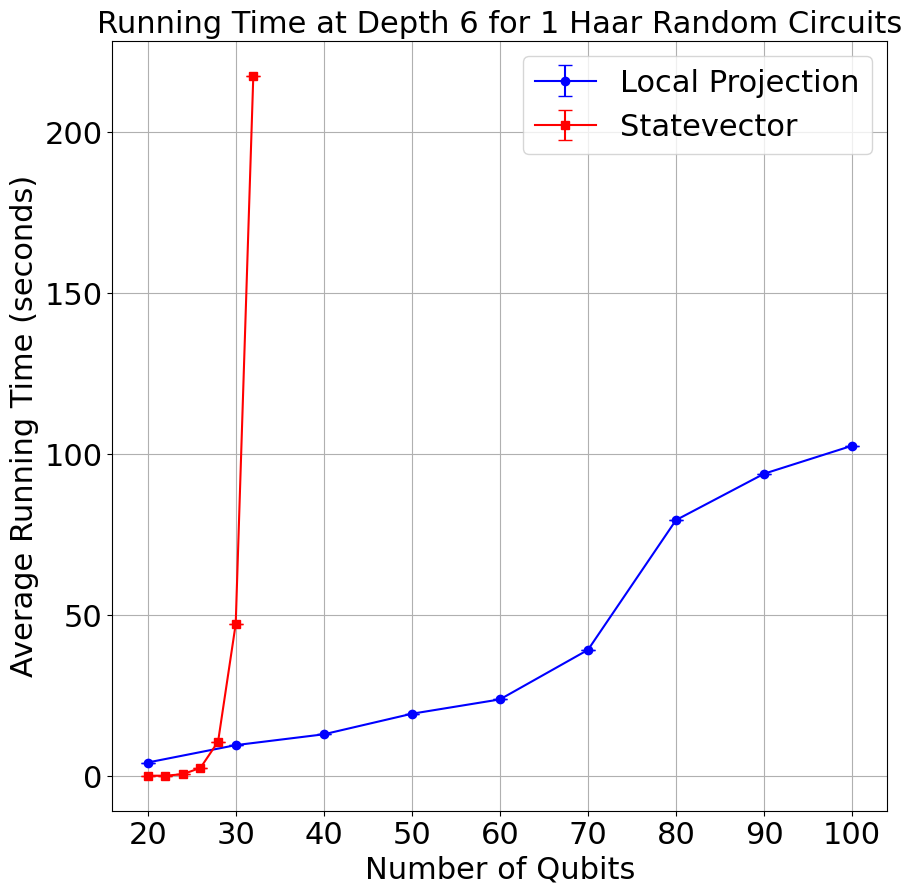

In [3]:

local_projection_computation.plot_statevector_vs_local_projection(file_name="Evaluation_Arifact_comparison_statevector_vs_local_projection_computation_depth_6.txt",
                                                                  output_file_name="Evaluation_Artifact_Running_time_Statevector_vs_Local_Projection_fixed_depth_6.pdf",n_patterns=n_patterns)

## Reproduce FIG 2a 

Remark: state vector computation at n=34 takes ~1000s, so we did not reproduce the result with large number of patterns

Number of qubits for local projection: [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
20 qubits for Local Projection: 4.916052s ± 0.000000s
30 qubits for Local Projection: 10.441983s ± 0.000000s
40 qubits for Local Projection: 15.568369s ± 0.000000s
50 qubits for Local Projection: 18.872151s ± 0.000000s
60 qubits for Local Projection: 23.152822s ± 0.000000s
70 qubits for Local Projection: 37.161163s ± 0.000000s
80 qubits for Local Projection: 77.686442s ± 0.000000s
90 qubits for Local Projection: 92.562269s ± 0.000000s
100 qubits for Local Projection: 104.810579s ± 0.000000s
110 qubits for Local Projection: 124.446765s ± 0.000000s
120 qubits for Local Projection: 136.437385s ± 0.000000s
130 qubits for Local Projection: 149.532731s ± 0.000000s
140 qubits for Local Projection: 156.721268s ± 0.000000s
150 qubits for Local Projection: 174.220601s ± 0.000000s
160 qubits for Local Projection: 188.457283s ± 0.000000s
170 qubits for Local Projection: 20

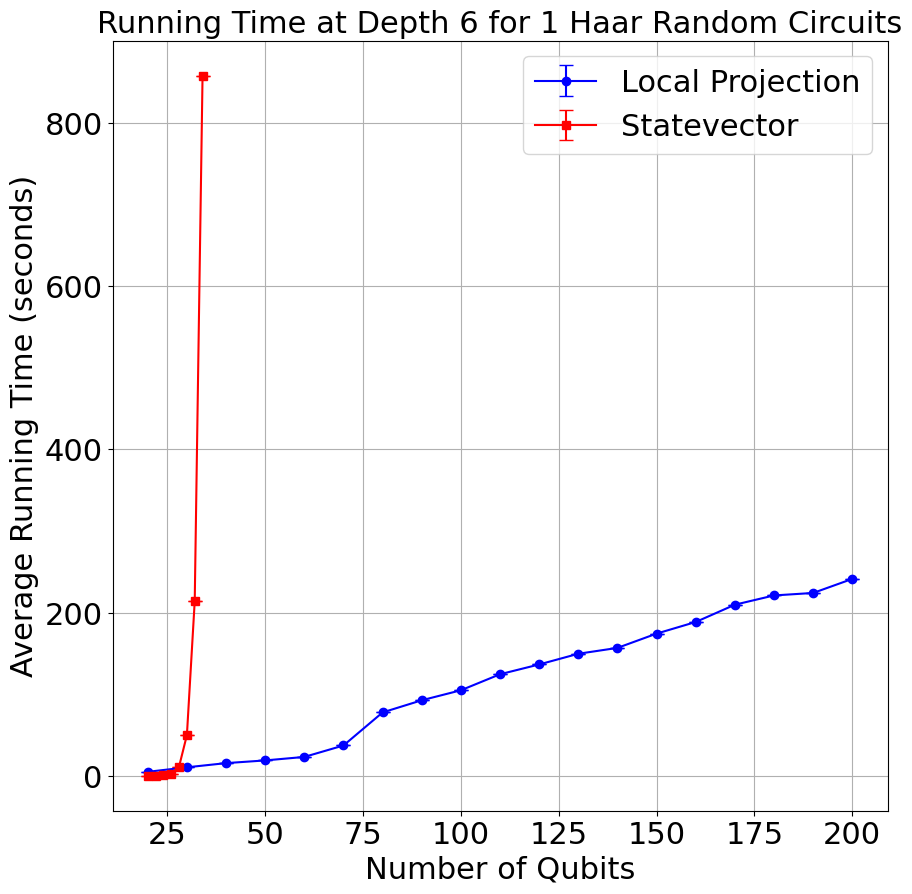

In [2]:
min_qubits_lp = 20 # Minimum number of qubits for local projection
max_qubits_lp = 200 # Maximum number of qubits for local projection
min_qubits_sv = 20 # Minimum number of qubits for statevector simulation
max_qubits_sv = 34 # Maximum number of qubits for statevector simulation
depth = 6 # Depth of the circuits to be compared
n_patterns = 1 # Number of patterns to be compared

local_projection_computation.benchmark_statevector_vs_local_projection(
        file_name="Evaluation_Arifact_comparison_statevector_vs_local_projection_computation_depth_6_reproduce_FIG_2a.txt", 
        min_qubits_lp=min_qubits_lp, max_qubits_lp=max_qubits_lp, 
        min_qubits_sv=min_qubits_sv, max_qubits_sv=max_qubits_sv, 
        depth=depth, n_patterns=n_patterns)

local_projection_computation.plot_statevector_vs_local_projection(file_name="Evaluation_Arifact_comparison_statevector_vs_local_projection_computation_depth_6_reproduce_FIG_2a.txt",
                                                                  output_file_name="Evaluation_Artifact_Running_time_Statevector_vs_Local_Projection_fixed_depth_6_reproduce_FIG_2a.pdf",n_patterns=n_patterns)

## Here is the submitted FIG 2a


['20', '4.643517017364502', '0.643517017364502', 'None', 'None', '0']
['30', '9.825352191925049', '0.458142364334923', 'None', 'None', '0']
['40', '14.161988019943237', '0.732392127432111', 'None', 'None', '0']
['50', '17.19209313392639', '1.073725475738283', 'None', 'None', '0']
['60', '30.09887385368347', '0.795353726416377', 'None', 'None', '0']
['70', '52.60517168045044', '0.985334637715156', 'None', 'None', '0']
['80', '88.48243546485901', '1.436383372375155', 'None', 'None', '0']
['90', '105.69441056251526', '1.352351237782388', 'None', 'None', '0']
['100', '129.6445898214976', '2.048463663180412', 'None', 'None', '0']
['110', '131.5029730796814', '1.584926151728237', 'None', 'None', '0']
['120', '150.74897289276123', '1.986422744614253', 'None', 'None', '0']
['130', '167.41422176361084', '0.85378252436381', 'None', 'None', '0']
['140', '179.50097465515137', '2.846464726262719', 'None', 'None', '0']
['150', '188.31852269172668', '1.374739163840307', 'None', 'None', '0']
['160', '

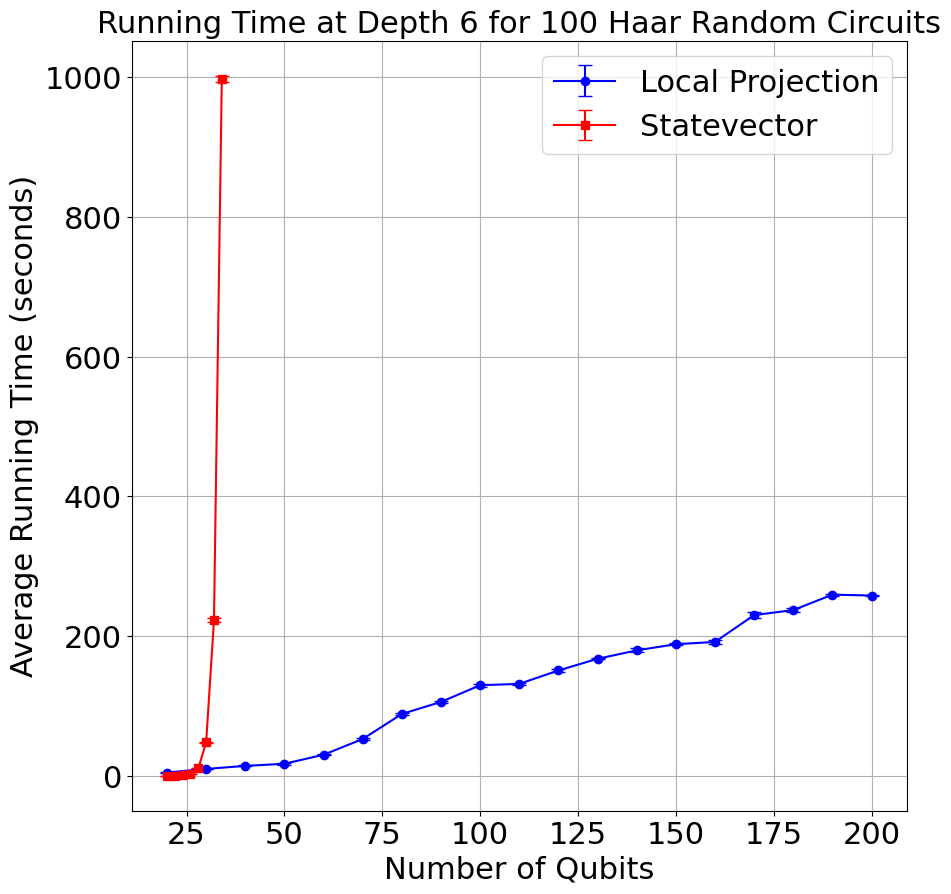

In [11]:
# Plotting results that is submitted in the paper in FIG_2a

local_projection_computation.plot_statevector_vs_local_projection("SUBMITTED_comparison_statevector_vs_local_projection_computation_depth_6_FIG_2a.txt","SUBMITTED_FIG_2a.pdf",n_patterns=100)

### Considering Figure 2b from the Paper

In this experiment, we **fix the number of qubits** and observe how the runtime scales with **increasing circuit depth**.

The function used to compute and save the runtime results is:

```python
def benchmark_statevector_vs_local_projection_by_depth(
    file_name="comparison_statevector_vs_local_projection_fixed_n_qubits.txt",
    n_qubits=20, 
    min_depth=1, 
    max_depth=4, 
    num_patterns=3
)


### One can practice with it with the following block:

Number of qubits for both methods: 20
Depth range: 1 to 6
Depth 1: Local Projection = 0.000467s ± 0.000000s, Statevector = 0.089358s ± 0.000000s, Inconsistencies = 0
Depth 2: Local Projection = 0.002301s ± 0.000000s, Statevector = 0.015558s ± 0.000000s, Inconsistencies = 0
Depth 3: Local Projection = 0.005443s ± 0.000000s, Statevector = 0.052038s ± 0.000000s, Inconsistencies = 0
Depth 4: Local Projection = 0.031340s ± 0.000000s, Statevector = 0.059690s ± 0.000000s, Inconsistencies = 0
Depth 5: Local Projection = 0.294316s ± 0.000000s, Statevector = 0.085515s ± 0.000000s, Inconsistencies = 0
Depth 6: Local Projection = 5.088814s ± 0.000000s, Statevector = 0.086445s ± 0.000000s, Inconsistencies = 0


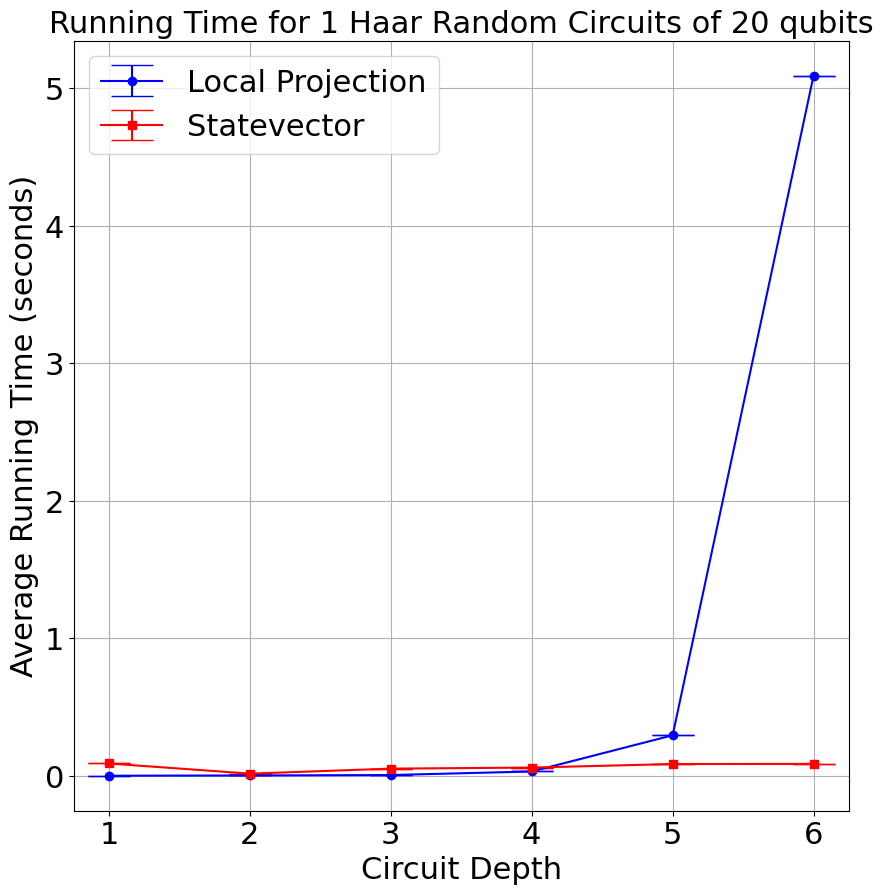

In [ ]:
n_qubits = 20 # Number of qubits for the local projection computation
min_depth = 1 # Minimum depth of the circuits to be compared
max_depth = 6 # Maximum depth of the circuits to be compared
n_patterns = 1 # Number of patterns to be compared

local_projection_computation.benchmark_statevector_vs_local_projection_by_depth(file_name="Evaluation_Artifact_comparison_statevector_vs_local_projection_fixed_n_qubits.txt",
                                                                                n_qubits=n_qubits, min_depth=min_depth, max_depth=max_depth, n_patterns=n_patterns)
# Example Usage
local_projection_computation.plot_statevector_vs_local_projection_by_depth(file_name="Evaluation_Artifact_comparison_statevector_vs_local_projection_fixed_n_qubits.txt",
                                                                           output_file_name="Evaluation_Artifact_comparison_statevector_vs_local_projection_fixed_n_qubits.pdf",
                                                                           num_patterns=n_patterns, n_qubits=n_qubits)


## Reproduce FIG 2b

Remark: depth 7 of local projection takes ~1000s

In [ ]:
n_qubits = 30 # Number of qubits for the local projection computation
min_depth = 1 # Minimum depth of the circuits to be compared
max_depth = 7 # Maximum depth of the circuits to be compared
n_patterns = 1 # Number of patterns to be compared

local_projection_computation.benchmark_statevector_vs_local_projection_by_depth(file_name="Evaluation_Artifact_comparison_statevector_vs_local_projection_fixed_n_qubits_reproduced_FIG_2b.txt",
                                                                                n_qubits=n_qubits, min_depth=min_depth, max_depth=max_depth, n_patterns=n_patterns)
# Example Usage
local_projection_computation.plot_statevector_vs_local_projection_by_depth(file_name="Evaluation_Artifact_comparison_statevector_vs_local_projection_fixed_n_qubits_reproduced_FIG_2b.txt",
                                                                           output_file_name="Evaluation_Artifact_comparison_statevector_vs_local_projection_fixed_n_qubits_reproduced_FIG_2b.pdf",
                                                                           num_patterns=n_patterns, n_qubits=n_qubits)


## Here is the submitted FIG 2b

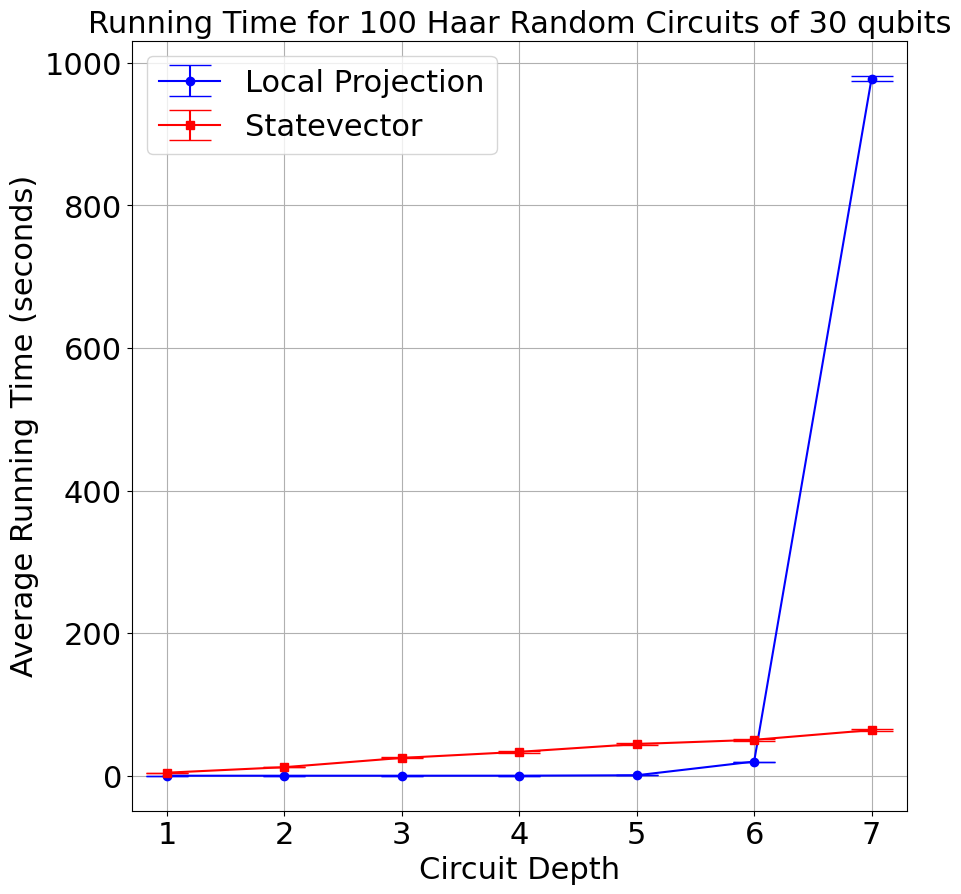

In [4]:
local_projection_computation.plot_statevector_vs_local_projection_by_depth(file_name="SUBMITTED_comparison_statevector_vs_local_projection_fixed_n_qubits_FIG_2b.txt",output_file_name="SUBMITTED_FIG_2b.pdf",num_patterns=100, n_qubits=30)